# RecDP end to end pipeline

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
test_data = pd.read_csv("ibm_fraud_detect_test.csv")

In [2]:
from pyrecdp.autofe import FeatureWrangler, DataEstimator

config = {'dataset': test_data, 'label': 'Is Fraud?'}
predict_pipeline = DataEstimator(data_pipeline = "fraud_detect.json", method = 'predict', config = config)
predictions = predict_pipeline.fit_transform()

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


{0: DataFrame, 1: type_infer, 2: fillna, 3: rename, 4: categorify, 5: DataFrame, 6: type_infer, 7: string_to_number, 8: astype, 9: fillna, 10: rename, 11: datetime_feature, 12: drop, 13: onehot_encode, 14: list_onehot_encode, 15: categorify, 16: rename, 17: drop, 18: DataFrame, 19: lightgbm}
execute with pandas started ...
execute DataFrame started ...
  execute DataFrame took 4.298053681850433e-06 sec
execute type_infer started ...
  execute type_infer took 1.5628058463335037e-05 sec
execute fillna started ...
  execute fillna took 0.10799665213562548 sec
execute rename started ...
  execute rename took 0.12965872907079756 sec
execute categorify started ...
  execute categorify took 0.3246409520506859 sec
execute DataFrame started ...
  execute DataFrame took 1.1089956387877464e-05 sec
execute type_infer started ...
  execute type_infer took 0.47268251702189445 sec
execute string_to_number started ...
  execute string_to_number took 1.924269936978817 sec
execute astype started ...
  e

In [3]:
predict_pipeline.transformed_cache

,User,Card,Year,Month,Day,Merchant_Name,Zip,MCC,Is_Fraud,Amount__string_to_number,Time__day,Time__month,Time__weekday,Time__year,Time__hour,Use_Chip__Chip_Transaction,Use_Chip__Online_Transaction,Use_Chip__Swipe_Transaction,Errors_Bad_CVV,Errors_Bad_Card_Number,Errors_Bad_Expiration,Errors_Bad_PIN,Errors_Bad_Zipcode,Errors_Insufficient_Balance,Errors_Technical_Glitch,Use_Chip__idx,Merchant_City__idx,Merchant_State__idx,Errors__idx,predict_value
0,0,0,2019,1,5,7522433618679272954,1541.0,5411,0,120,31,3,4,2023,6,1,0,0,0,0,0,0,0,1,0,0,6251,62,19,0.001175
1,0,0,2019,1,6,-2744911404133435018,1536.0,5812,0,68,31,3,4,2023,20,1,0,0,0,0,0,0,0,0,0,0,5451,62,0,0.001175
2,0,0,2019,1,9,-4693979874497918566,1536.0,7538,0,59,31,3,4,2023,10,1,0,0,0,0,0,0,0,0,0,0,5451,62,0,0.001175
3,0,0,2019,1,11,7522433618679272954,1541.0,5411,0,16,31,3,4,2023,13,1,0,0,0,0,0,0,0,0,0,0,6251,62,0,0.001175
4,0,0,2019,1,12,1913477460590765860,1566.0,5300,0,132,31,3,4,2023,5,1,0,0,0,0,0,0,0,0,0,0,7428,62,0,0.001175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2060433,1999,1,2020,2,27,-5162038175624867091,3054.0,5541,0,54,31,3,4,2023,22,1,0,0,0,0,0,0,0,0,0,0,4818,79,0,0.001175
2060434,1999,1,2020,2,27,-5162038175624867091,3054.0,5541,0,54,31,3,4,2023,22,1,0,0,0,0,0,0,0,0,0,0,4818,79,0,0.001175
2060435,1999,1,2020,2,28,2500998799892805156,3054.0,4121,0,59,31,3,4,2023,7,1,0,0,0,0,0,0,0,0,0,0,4818,79,0,0.001175
2060436,1999,1,2020,2,28,2500998799892805156,3054.0,4121,0,43,31,3,4,2023,20,1,0,0,0,0,0,0,0,0,0,0,4818,79,0,0.001175


In [4]:
predictions[(predictions['Is_Fraud'] == 1) & (predictions['predict_value'] > 0.5)]

,User,Card,Year,Month,Day,Merchant_Name,Zip,MCC,Is_Fraud,Amount__string_to_number,Time__day,Time__month,Time__weekday,Time__year,Time__hour,Use_Chip__Chip_Transaction,Use_Chip__Online_Transaction,Use_Chip__Swipe_Transaction,Errors_Bad_CVV,Errors_Bad_Card_Number,Errors_Bad_Expiration,Errors_Bad_PIN,Errors_Bad_Zipcode,Errors_Insufficient_Balance,Errors_Technical_Glitch,Use_Chip__idx,Merchant_City__idx,Merchant_State__idx,Errors__idx,predict_value
1444,1,1,2019,5,11,9057735476014445185,-1.0,5311,1,14,31,3,4,2023,14,1,0,0,0,0,0,0,0,0,0,0,6581,52,0,0.962832
1460,1,1,2019,5,25,3189517333335617109,-1.0,5311,1,130,31,3,4,2023,14,1,0,0,0,0,0,0,0,0,0,0,6581,52,0,1.000000
1461,1,1,2019,5,25,3189517333335617109,-1.0,5311,1,38,31,3,4,2023,14,1,0,0,0,0,0,0,0,0,0,0,6581,52,0,1.000000
9457,6,1,2019,3,12,3189517333335617109,-1.0,5311,1,0,31,3,4,2023,13,1,0,0,0,0,0,0,0,0,0,0,6581,52,0,1.000000
9479,6,1,2019,3,21,4573875080712571902,-1.0,5045,1,71,31,3,4,2023,16,1,0,0,0,0,0,0,0,0,0,0,6581,52,0,0.933920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052978,1993,1,2019,5,24,9057735476014445185,-1.0,5311,1,90,31,3,4,2023,17,1,0,0,0,0,0,0,0,0,0,0,6581,52,0,0.962832
2052981,1993,1,2019,5,28,3189517333335617109,-1.0,5311,1,16,31,3,4,2023,10,1,0,0,0,0,0,1,0,0,0,0,6581,52,13,1.000000
2052983,1993,1,2019,5,30,-5674292871952204677,-1.0,5733,1,4,31,3,4,2023,11,1,0,0,0,0,0,0,0,0,0,0,6581,52,0,0.999994
2055992,1996,3,2019,6,22,9057735476014445185,-1.0,5311,1,761,31,3,4,2023,15,1,0,0,0,0,0,0,0,0,0,0,6581,52,0,0.962832


In [5]:
predictions[(predictions['Is_Fraud'] == 0) & (predictions['predict_value'] < 0.5)]

,User,Card,Year,Month,Day,Merchant_Name,Zip,MCC,Is_Fraud,Amount__string_to_number,Time__day,Time__month,Time__weekday,Time__year,Time__hour,Use_Chip__Chip_Transaction,Use_Chip__Online_Transaction,Use_Chip__Swipe_Transaction,Errors_Bad_CVV,Errors_Bad_Card_Number,Errors_Bad_Expiration,Errors_Bad_PIN,Errors_Bad_Zipcode,Errors_Insufficient_Balance,Errors_Technical_Glitch,Use_Chip__idx,Merchant_City__idx,Merchant_State__idx,Errors__idx,predict_value
0,0,0,2019,1,5,7522433618679272954,1541.0,5411,0,120,31,3,4,2023,6,1,0,0,0,0,0,0,0,1,0,0,6251,62,19,0.001175
1,0,0,2019,1,6,-2744911404133435018,1536.0,5812,0,68,31,3,4,2023,20,1,0,0,0,0,0,0,0,0,0,0,5451,62,0,0.001175
2,0,0,2019,1,9,-4693979874497918566,1536.0,7538,0,59,31,3,4,2023,10,1,0,0,0,0,0,0,0,0,0,0,5451,62,0,0.001175
3,0,0,2019,1,11,7522433618679272954,1541.0,5411,0,16,31,3,4,2023,13,1,0,0,0,0,0,0,0,0,0,0,6251,62,0,0.001175
4,0,0,2019,1,12,1913477460590765860,1566.0,5300,0,132,31,3,4,2023,5,1,0,0,0,0,0,0,0,0,0,0,7428,62,0,0.001175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2060433,1999,1,2020,2,27,-5162038175624867091,3054.0,5541,0,54,31,3,4,2023,22,1,0,0,0,0,0,0,0,0,0,0,4818,79,0,0.001175
2060434,1999,1,2020,2,27,-5162038175624867091,3054.0,5541,0,54,31,3,4,2023,22,1,0,0,0,0,0,0,0,0,0,0,4818,79,0,0.001175
2060435,1999,1,2020,2,28,2500998799892805156,3054.0,4121,0,59,31,3,4,2023,7,1,0,0,0,0,0,0,0,0,0,0,4818,79,0,0.001175
2060436,1999,1,2020,2,28,2500998799892805156,3054.0,4121,0,43,31,3,4,2023,20,1,0,0,0,0,0,0,0,0,0,0,4818,79,0,0.001175


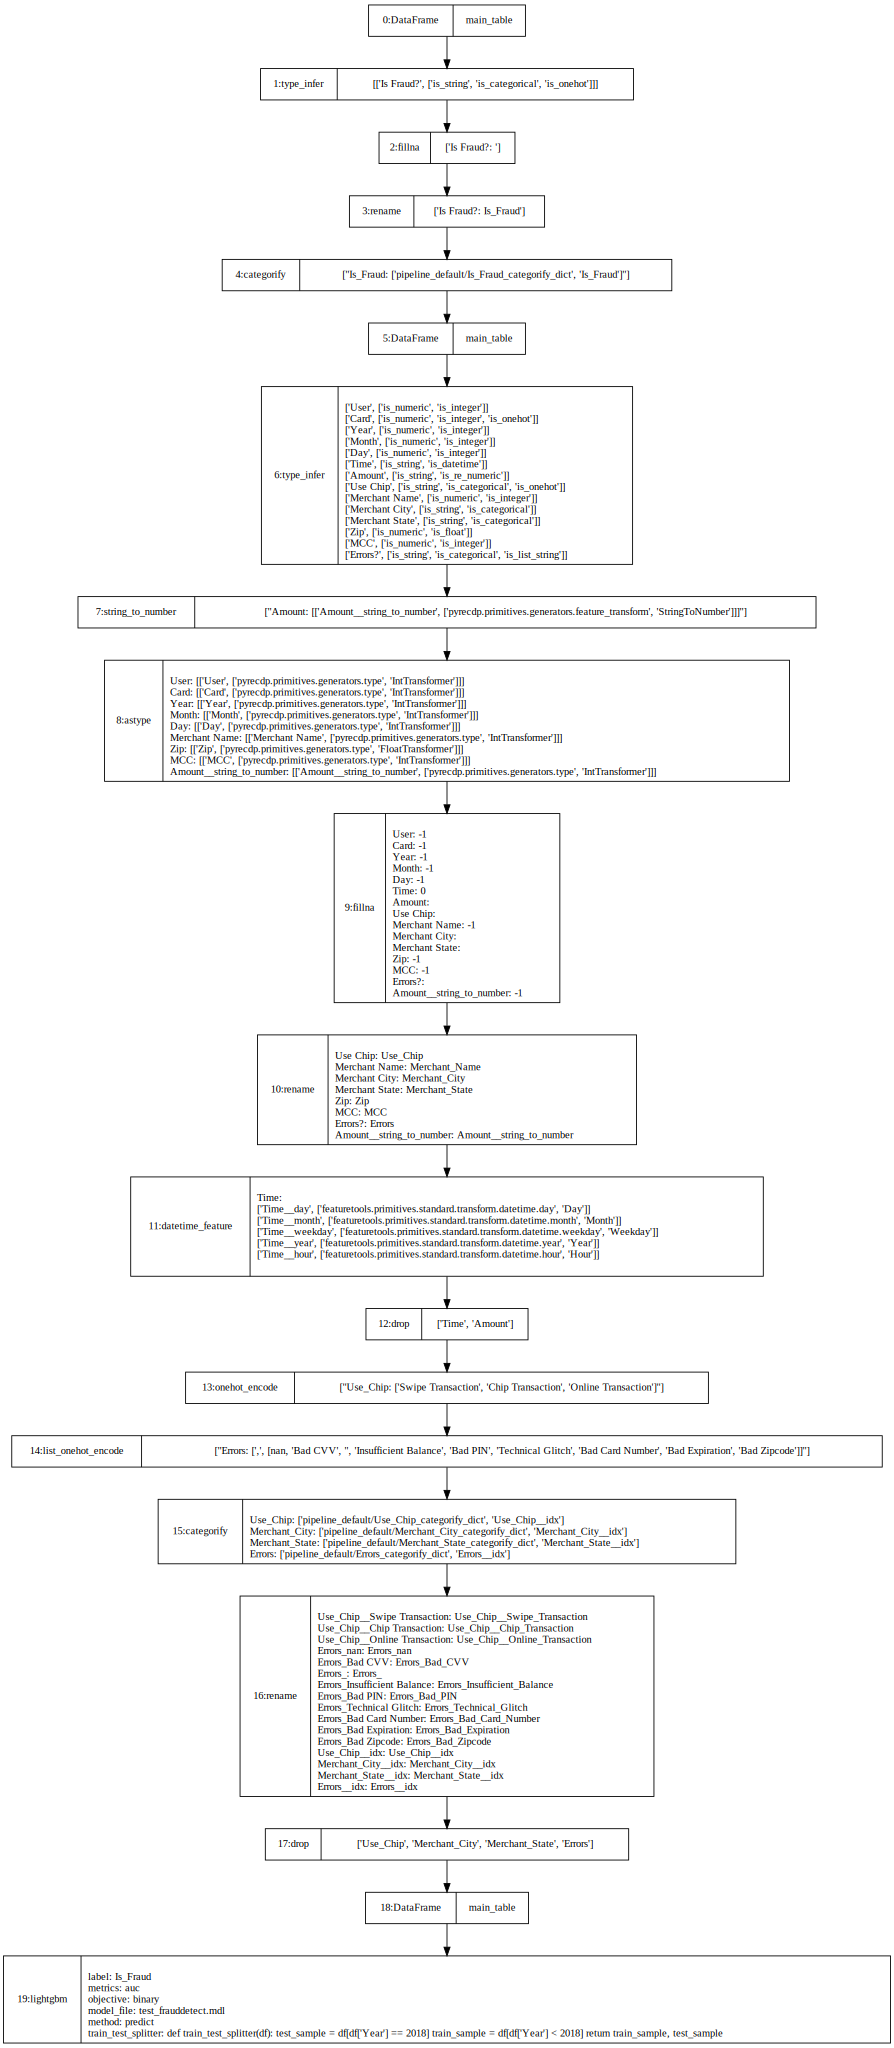

In [14]:
predict_pipeline.plot()

# backup, 

In [9]:
from pyrecdp.autofe import TabularPipeline

base_pipeline = TabularPipeline(dataset = test_data, label = 'Is Fraud?')
base_pipeline.import_from_json("fraud_detect.json")
base_pipeline.fit_transform()

{0: DataFrame, 1: type_infer, 2: fillna, 3: rename, 4: categorify, 5: DataFrame, 6: type_infer, 7: string_to_number, 8: fillna, 9: rename, 10: datetime_feature, 11: drop, 12: categorify, 13: onehot_encode, 14: list_onehot_encode, 15: rename, 16: drop, 17: astype}
execute with pandas started ...
execute DataFrame started ...
  execute DataFrame took 5.067093297839165e-06 sec
execute type_infer started ...
  execute type_infer took 1.9039027392864227e-05 sec
execute fillna started ...
  execute fillna took 0.10488297510892153 sec
execute rename started ...
  execute rename took 0.08482241304591298 sec
execute categorify started ...
  execute categorify took 0.3054002330172807 sec
execute DataFrame started ...
  execute DataFrame took 7.900875061750412e-06 sec
execute type_infer started ...
  execute type_infer took 0.3691972070373595 sec
execute string_to_number started ...
  execute string_to_number took 2.2583618848584592 sec
execute fillna started ...
  execute fillna took 0.701028974

,User,Card,Year,Month,Day,Merchant_Name,Zip,MCC,Is_Fraud,Amount__string_to_number,Time__day,Time__month,Time__weekday,Time__year,Time__hour,Use_Chip__idx,Merchant_City__idx,Merchant_State__idx,Errors__idx,Card__0,Card__1,Card__2,Card__3,Card__4,Card__5,Card__6,Card__7,Card__8,Use_Chip__Chip_Transaction,Use_Chip__Online_Transaction,Use_Chip__Swipe_Transaction,Errors_Bad_CVV,Errors_Bad_Card_Number,Errors_Bad_Expiration,Errors_Bad_PIN,Errors_Bad_Zipcode,Errors_Insufficient_Balance,Errors_Technical_Glitch
0,0,0,2019,1,5,7522433618679272954,1541.0,5411,0,120,31,3,4,2023,6,0,6251,62,19,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,2019,1,6,-2744911404133435018,1536.0,5812,0,68,31,3,4,2023,20,0,5451,62,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,2019,1,9,-4693979874497918566,1536.0,7538,0,59,31,3,4,2023,10,0,5451,62,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,2019,1,11,7522433618679272954,1541.0,5411,0,16,31,3,4,2023,13,0,6251,62,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,2019,1,12,1913477460590765860,1566.0,5300,0,132,31,3,4,2023,5,0,7428,62,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2060433,1999,1,2020,2,27,-5162038175624867091,3054.0,5541,0,54,31,3,4,2023,22,0,4818,79,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2060434,1999,1,2020,2,27,-5162038175624867091,3054.0,5541,0,54,31,3,4,2023,22,0,4818,79,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2060435,1999,1,2020,2,28,2500998799892805156,3054.0,4121,0,59,31,3,4,2023,7,0,4818,79,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2060436,1999,1,2020,2,28,2500998799892805156,3054.0,4121,0,43,31,3,4,2023,20,0,4818,79,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
